## NOTEBOOK DESCRIPTION:

This notebook checks the behaviour of the embedding space: 
- It first checks manually the nearest neighbors of some selected channels
- It also compute the user jumper score which is a first barrier on the evaluation of the embedding

In [1]:
import pickle
import os
import sys
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *

scriptpath = "/home/jouven/youtube_projects"
sys.path.append(os.path.abspath(scriptpath))
from helpers.config_threshold_value import *

### Useful functions

In [2]:
# Selected channels and id-index mapping
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_0.0043_LR_0.005/models/embedding0.csv.gz'

In [4]:
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [5]:
channelcrawler.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [6]:
channelcrawler['category_cc'].unique()

array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

### Manually check the neirest neighbors of some selected channels

First to check how good is the embedding space, we are going to choose a channel and it's k closest channels in the embedding space. By looking at these channels in the YouTube website, we have a sense of how good/bad is the embedding.

In [24]:
# Looking at the neirest neigbors of `Shaaanxo` being a girl fashion channel
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCMpOz2KEfkSdd5JeIJh_fxw,Howto & Style,2009-01-18,Shaaanxo,3215340,1422,3566.0,2.2780
1,UCzTKskwIc_-a0cGvCXA848Q,Howto & Style,2008-06-23,NikkieTutorials,12269235,742,312.0,2.0870
2,UCXbQzhqSvgVZTUyi1T4AU3w,Howto & Style,2011-08-31,Lauren Curtis,3530000,379,3067.0,2.2335
3,UC8v4vz_n2rys6Yxpj8LuOBA,Howto & Style,2013-01-26,KathleenLights,4140000,979,2308.0,2.1680
4,UC21yq4sq8uxTcfgIxxyE9VQ,Howto & Style,2011-06-27,Carli Bybel,6190000,546,1234.0,2.0870
5,UC6jgzx2g3nlbaYkd8EMweKA,Howto & Style,2010-09-07,Jaclyn Hill,5890000,344,1348.0,2.0870
6,UCbO9bltbkYwa56nZFQx6XJg,Howto & Style,2014-07-17,Manny Mua,4800000,426,1910.0,2.0870
7,UCDHQbU57NZilrhbuZNbQcRA,Howto & Style,2013-02-27,PatrickStarrr,4430000,358,2108.0,2.1275
8,UCkvK_5omS-42Ovgah8KRKtg,Howto & Style,2006-02-14,jeffreestar,16000000,357,222.0,2.0870
9,UCLFW3EKD2My9swWH4eTLaYw,Howto & Style,2012-03-06,Chloe Morello,2700000,518,4490.0,2.3680


In [25]:
# Looking at the neirest neigbors of `Alex Costa` being a men fashion channel
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCZyCposXwcyopaACep44maQ'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCZyCposXwcyopaACep44maQ,Howto & Style,2011-09-29,Alex Costa,2120000,543,5370.0,2.4170
1,UC1KbedtKa3d5dleFR6OjQMg,Howto & Style,2008-07-06,alpha m.,5360000,1116,1376.0,2.0870
2,UChNN7VBxPTiNrqjUaQd9bxA,Howto & Style,2012-09-14,Teachingmensfashion,4210000,1160,2093.0,2.1225
3,UC1PkRYud11ogYDqgdqd23Zw,Entertainment,2016-05-24,Based Zeus,1280000,203,11725.0,2.6665
4,UCe0TLA0EsQbE-MjuHXevj2A,Howto & Style,2006-12-16,ATHLEAN-X™,8520000,1049,657.0,2.0870
5,UCmRfQHc3U4fV1-i8Ry1HmtA,Howto & Style,2010-12-06,Real Men Real Style,2400000,1315,4867.0,2.3575
6,UCbq8_4_mFAx_rzDF5VT7MJw,Howto & Style,2013-11-11,BluMaan,1530000,381,9009.0,2.5520
7,UCtQEjfEFzba37ozoXK40r3w,People & Blogs,2013-09-29,How to Beast,641000,350,21034.0,2.9230
8,UCC-ygwC3ZfSRhIcao8a2zyQ,Howto & Style,2009-01-27,Slikhaar TV - Mens h...,2030000,603,6676.0,2.4925
9,UCjTMOi3cpslA7JUmPdfD6MQ,Howto & Style,2011-04-14,Tripp Advice,821000,714,19010.0,2.8790


In [26]:
# Looking at the neirest neigbors of `Magpiepony` which is a kids film
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCISF5OGuAtSLNF24TKTnXag,Film and Animation,2013-12-17,Magpiepony,736000,304,21120.0,2.9225
1,UC1AEadAUKi6Zt-G3PatrU-Q,Film and Animation,2012-08-19,Letupita725HD★,2698245,2115,4054.0,2.3350
2,UC1RMBtYn0Fw8Pf7KuvkrRNw,Gaming,2009-11-01,Vannamelon,919000,241,17845.0,2.8605
3,UC9qgVkKRZUXcgHdf35Z-8dw,Film and Animation,2013-06-24,My Little Pony Offic...,874016,1840,12248.0,2.6960
4,UCMsgXPD3wzzt8RxHJmXH7hQ,Entertainment,2006-02-28,Cartoon Network,5890000,5962,1095.0,2.0870
5,UC3McNQHov_mlOk3Wg6U5Caw,Comedy,2013-01-20,discontinued channel...,763182,45,21086.0,2.9245
6,UCPflSzRRyzK2hhbVxNAnrhw,Film and Animation,2012-03-31,Pinkie Pie,1229394,451,11840.0,2.6965
7,UCD_VOth7RmckN6DbmFJa__A,Entertainment,2013-08-31,The Brony Notion,256132,158,70689.0,3.7420
8,UCHKDtSVVEc686EW7jRSCpZA,Entertainment,2007-04-01,Scribbler Production...,327000,1767,54604.0,3.5110
9,UCtwPBSnKnAsvZeKLLig774A,Film and Animation,2011-12-16,Fluffle Puff,1228197,49,12810.0,2.7330


In [27]:
# Looking at neirest neigbors of `Beyond the trailer` a channel for analysis of films
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCAXR2zenCwvRIyQd9ydtfaA,Entertainment,2008-11-03,Beyond The Trailer,853000,5064,19744.0,2.8635
1,UC7v3-2K1N84V67IF-WTRG-Q,Entertainment,2007-03-07,Jeremy Jahns,1600000,1584,8351.0,2.5415
2,UCCqEeDAUf4Mg0GgEN658tkA,Entertainment,2011-01-06,Chris Stuckmann,1580000,1400,8486.0,2.5600
3,UCQMbqH7xJu5aTAPQ9y_U7WQ,Entertainment,2009-03-05,Fandom Entertainment...,1570000,10813,9597.0,2.5995
4,UCDiFRMQWpcp8_KD4vwIVicw,Entertainment,2012-10-12,Emergency Awesome,3210000,3949,3268.0,2.2750
5,UCi8e0iOVk1fEOogdfu4YgfA,Film and Animation,2011-04-01,Movieclips Trailers,13900000,8084,267.0,2.0870
6,UCWvMmm_sSdgALpo1Ci4WvtQ,Entertainment,2007-02-04,Collider Videos,583000,9074,30710.0,3.0665
7,UCOpcACMWblDls9Z6GERVi1A,Film and Animation,2008-10-03,Screen Junkies,6660000,1014,1096.0,2.0870
8,UCP1iRaFlS5EYjJBryFV9JPw,Entertainment,2015-11-25,Looper,4820000,2533,1758.0,2.0870
9,UC20DNxT_UjT49mYOIocJAww,Entertainment,2012-06-20,ComicBookCast2,473000,7153,34911.0,3.2230


In [28]:
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCaCTtPkowVggMiUYhQmlcMw'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCaCTtPkowVggMiUYhQmlcMw,Sports,2015-12-30,CrossFit Invictus,27200,196,440262.0,7.1160
1,UCSnnzcYG3QbW7kJjz915JmQ,Sports,2012-01-24,Shrugged Collective,196000,1328,90526.0,3.7415
2,UC1lfnF3avRvtFm_wajLLhyg,People & Blogs,2014-07-01,TeamRICHEY,208596,993,79056.0,3.6700
3,UC-EHVRgFKSj33ZyWj1NFiRg,Entertainment,2008-04-22,MATT VINCENT,32300,1196,404398.0,8.2465
4,UC9zEqIwv7yPQ8IlzNYpB_Aw,Howto & Style,2013-02-06,Keltie O'Connor,153132,238,98128.0,3.6110
5,UCzUd3H_e_qWqs4dR4GxVHOQ,People & Blogs,2017-02-14,Training Think Tank,19200,287,582830.0,6.6245
6,UCQHhd5lxVEkGidVXXegTisw,Sports,2014-07-01,Structure Your Stren...,19300,485,541864.0,8.7070
7,UCkvMQqAMLDCjNAhZmGVBRMQ,People & Blogs,2018-05-27,Jacob Heppner,44600,363,291984.0,5.1590
8,UCtWRT7D9MgHFsc_WEG3l2yQ,Sports,2014-09-29,Brute Strength,151000,515,107820.0,4.4900
9,UCsaM3jWYGJh-IXs3YWv_Rtg,Sports,2012-03-30,FITAID,23500,197,507277.0,6.9845


### User jumper implementation

In [7]:
# We randomly choose 3 000 users and for each user we select a random pair of channel
# channels_tuple = [(channel_1, channel_2), (...)]
with open(os.path.join(COMMON_PATH, "channels_tuple_user_walk.pkl"),'rb') as f:
     channels_tuple = pickle.load(f)
f.close()

In [8]:
files = [PATH]
users_walk_tab, users_walk_tab_new, ranking_position_tab = get_user_walk_and_position_ratio(files, channels_tuple)

file  /dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_0.0043_LR_0.005/models/embedding0.csv.gz
n_comp  200


In [9]:
# Results correspondining to halow number of subscribers
# The file having the channels is positionned at "/dlabdata1/youtube_large/jouven/channels_more_300/channels_tuple_user_walk_low_subscribers.pkl"
# Only used for the report !
# print('User walk = ' + str(users_walk_tab))
# print('Ranking position ratio = ' + str(ranking_position_tab))

User walk = [0.1718331544202241]
User walk (new way) = [8438.212385304882]
Ranking position ratio = [0.27157512360092334]


In [18]:
print('User walk = ' + str(users_walk_tab))
print('Ranking position ratio = ' + str(ranking_position_tab))

User walk = [0.505537614421795]
User walk (new way) = [1.6550293698732224]
Ranking position ratio = [0.06410660566596717]


### Plot the embedding

In [7]:
ix_to_word, word_to_ix = channel_to_name(channelcrawler, dict_channel_ind)

In [8]:
# Project the embedding in 2D
'''
EMBEDDING = get_dataframe_in_embedding_space(PATH)

print("\n', 'running TSNE...")
tsne = TSNE(n_components = 2).fit_transform(EMBEDDING)
print("tsne.shape: ", tsne.shape) 

# Save the projected embedding in the 2D plane
np.save('/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_0.0043_LR_0.005/tsne.npy', tsne)
'''

'\nEMBEDDING = get_dataframe_in_embedding_space(PATH)\n\nprint("\n\', \'running TSNE...")\ntsne = TSNE(n_components = 2).fit_transform(EMBEDDING)\nprint("tsne.shape: ", tsne.shape) \n\n# Save the projected embedding in the 2D plane\nnp.save(\'/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_0.0043_LR_0.005/tsne.npy\', tsne)\n'

In [12]:
# Load the projected embedding in the 2D plane
tsne = np.load('/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/run_channels_more_300/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False_LR_0.005/tsne.npy')


Plot to visualize the embeddingg in 2D.
The channels appearing in the plot are the channels having more than 4000k subsribers. In addition, we have 20 colored channels representing the selected pairs in the "axis projection process". 

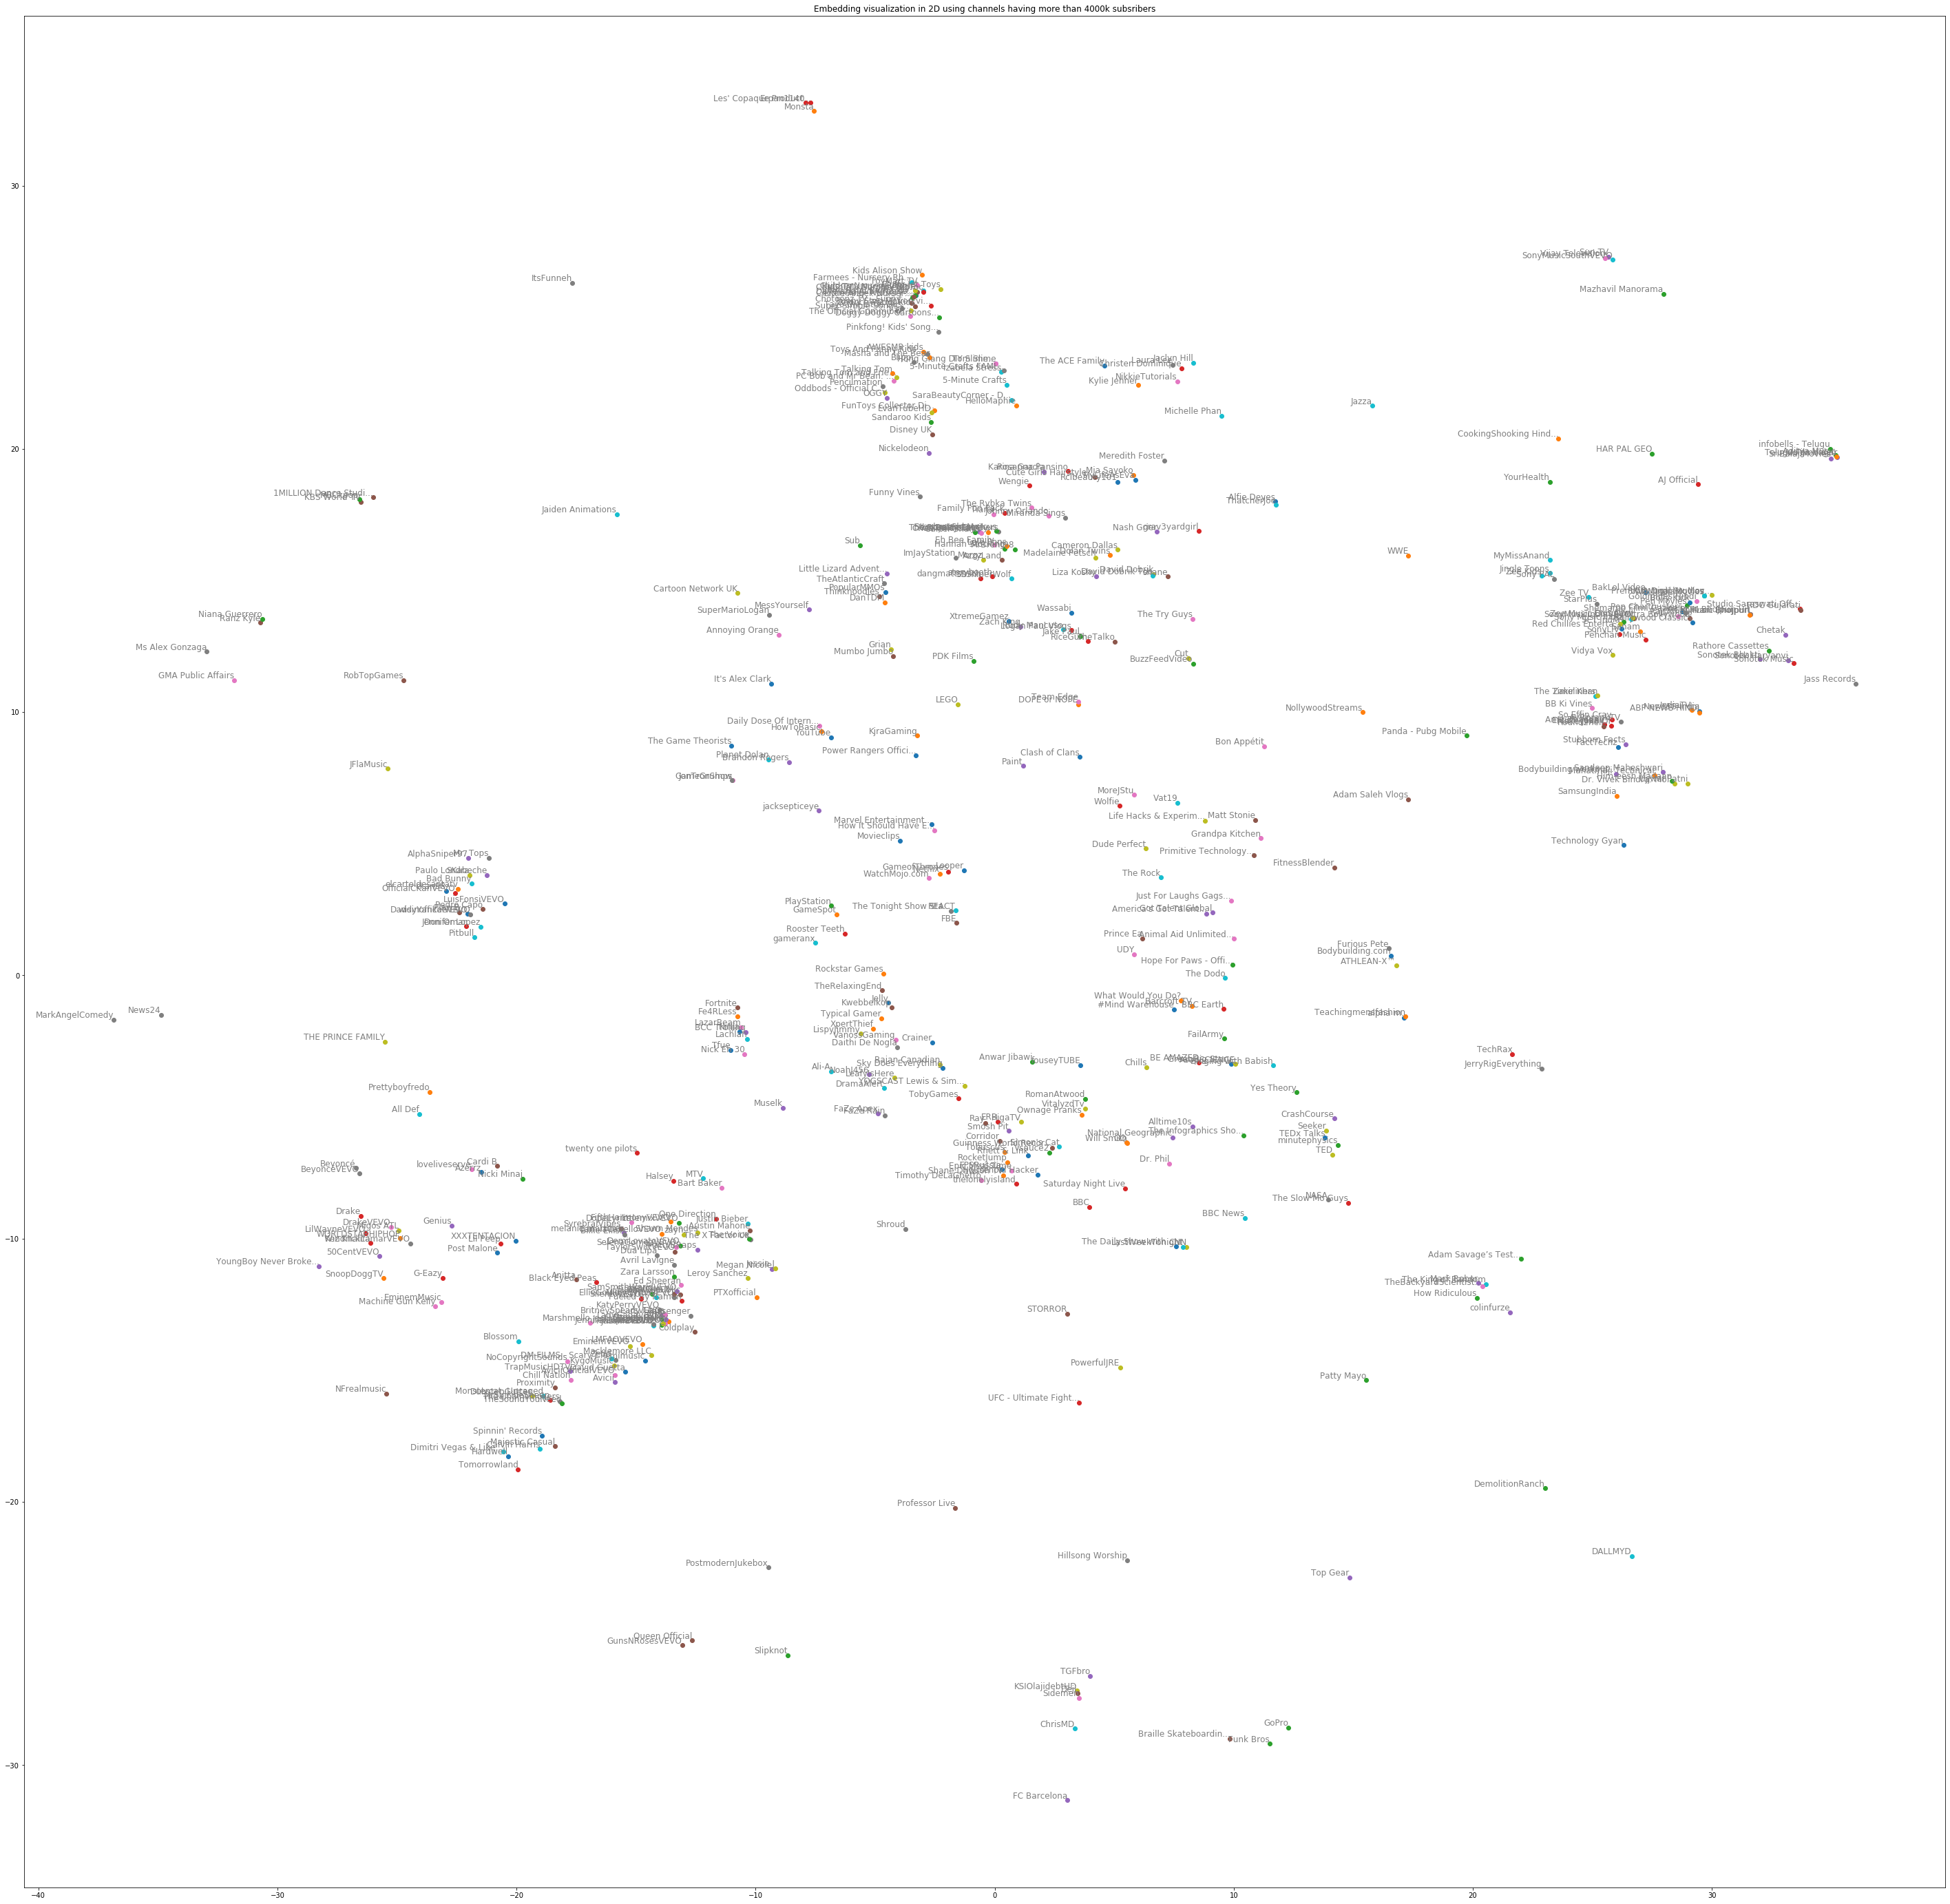

In [13]:
############ VISUALIZING ############
SAMPLES = 500
x, y = [], []
annotations = []
for idx, coord in enumerate(tsne):
    # print(coord)
    annotations.append(ix_to_word[idx])
    x.append(coord[0])
    y.append(coord[1])

test_words = [dict_ind_channel[channel] for channel in random.sample(range(len(channels_id)), SAMPLES)]
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_4000k_subs.pkl",'rb') as f:
     test_words = pickle.load(f)
f.close()
test_words = random.sample(test_words, SAMPLES)
plt.figure(figsize = (50, 50))
for i in range(len(test_words)):
    word = ix_to_word[dict_channel_ind[test_words[i]]]
    vocab_idx = word_to_ix[word]
    plt.scatter(x[vocab_idx], y[vocab_idx])
    
    plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', color = 'gray', fontsize = 12)
#plt.savefig("/home/jouven/youtube_projects/w2v.png")
plt.title("Embedding visualization in 2D using channels having more than 4000k subsribers")
plt.show()